In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [10]:
single_image=x_train[0]

In [11]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

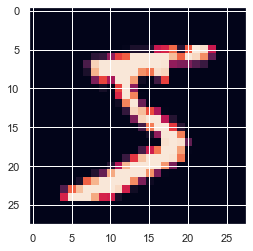

In [12]:
plt.imshow(single_image)

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train.shape

(60000,)

In [19]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_cat_test=to_categorical(y_test,num_classes=10)
y_cat_train=to_categorical(y_train,num_classes=10)

In [28]:
x_train=x_train/255

In [29]:
x_test=x_test/255

In [31]:
x_train[0].max()

1.0

In [34]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [35]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Dense,Conv2D,Flatten

In [36]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [39]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 328us/sample - loss: 0.1399 - accuracy: 0.9584 - val_loss: 0.0576 - val_accuracy: 0.9795
Epoch 2/10
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0468 - accuracy: 0.9857 - val_loss: 0.0465 - val_accuracy: 0.9849
Epoch 3/10
60000/60000 [==============================] - 19s 313us/sample - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0358 - val_accuracy: 0.9870
Epoch 4/10
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0474 - val_accuracy: 0.9841
Epoch 5/10
60000/60000 [==============================] - 20s 328us/sample - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0438 - val_accuracy: 0.9874


In [40]:
metrics=pd.DataFrame(model.history.history)

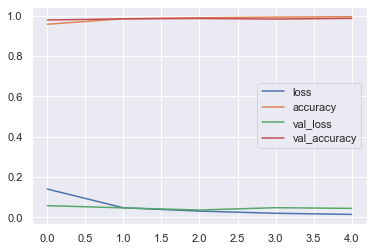

In [41]:
metrics.plot()

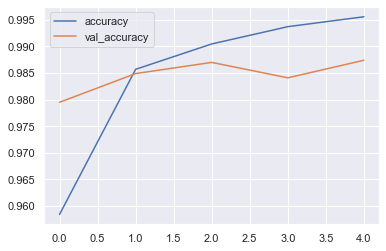

In [42]:
metrics[['accuracy','val_accuracy']].plot()

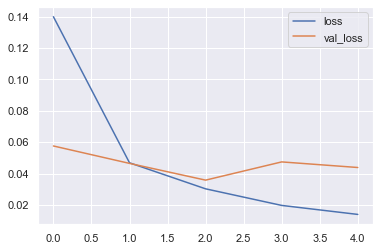

In [43]:
metrics[['loss','val_loss']].plot()

In [44]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 95us/sample - loss: 0.0438 - accuracy: 0.9874


[0.04384024537025361, 0.9874]

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
predictions=model.predict_classes(x_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
confusion_matrix(y_test,predictions)

array([[ 976,    2,    0,    1,    0,    0,    1,    0,    0,    0],
       [   0, 1134,    0,    0,    0,    0,    1,    0,    0,    0],
       [   1,    3, 1017,    0,    0,    0,    1,    5,    5,    0],
       [   0,    2,    2,  987,    0,   11,    0,    3,    5,    0],
       [   0,    1,    0,    0,  976,    0,    1,    0,    0,    4],
       [   1,    0,    0,    3,    0,  885,    3,    0,    0,    0],
       [   2,    2,    0,    0,    1,    1,  949,    0,    3,    0],
       [   0,    8,    4,    0,    0,    1,    0, 1012,    1,    2],
       [   3,    2,    1,    0,    0,    2,    1,    2,  960,    3],
       [   0,    4,    0,    0,    9,    5,    0,    9,    4,  978]],
      dtype=int64)

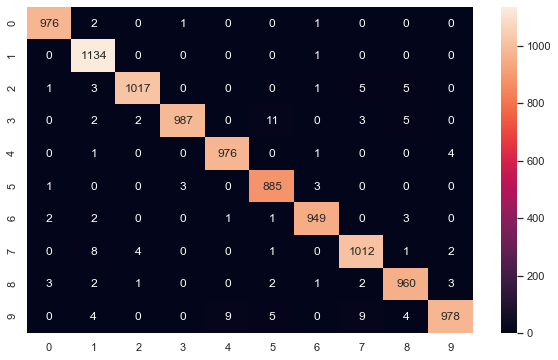

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d')

In [54]:
my_num=x_test[0]

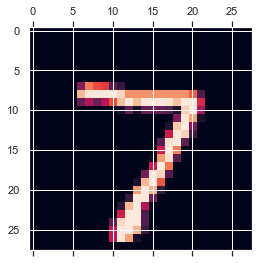

In [56]:
plt.matshow(my_num.reshape(28,28))

In [57]:
model.predict_classes(my_num.reshape(1,28,28,1))

array([7], dtype=int64)